In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import math
import warnings
import plotly.offline as py
import plotly.graph_objs as go

warnings.filterwarnings('ignore')

In [2]:
terrorism= pd.read_csv(r"F:\globalterrorismdb_0718dist.csv", encoding='latin1')

In [3]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terrorism.shape

(181691, 135)

In [5]:
terrorism.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [7]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## I'm collecting the important columns from the dataset for futher processes.

In [8]:
terrorism_1= terrorism[['iyear','gname','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','summary','attacktype1_txt','targtype1_txt','motive', 'weaptype1_txt', 'weapdetail' ]]
                      

In [9]:
terrorism_1.isnull().sum()

iyear                   0
gname                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
summary             66129
attacktype1_txt         0
targtype1_txt           0
motive             131130
weaptype1_txt           0
weapdetail          67670
dtype: int64

In [10]:
terrorism_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   gname            181691 non-null  object 
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        181270 non-null  object 
 7   city             181257 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  summary          115562 non-null  object 
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  motive           50561 non-null   object 
 14  weaptype1_txt    181691 non-null  object 
 15  weapdetail       114021 non-null  object 
dtypes: float64(2), int64(3), object(11)
me

In [11]:
terrorism_1.describe().T

,count,mean,std,min,25%,50%,75%,max
iyear,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
imonth,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
iday,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667


### Most count of data set

In [12]:
print("most attack in year:",terrorism_1['iyear'].value_counts().idxmax())
print("most attack by groups :",terrorism_1['gname'].value_counts().index[1])
print("most attack in month:",terrorism_1['imonth'].value_counts().idxmax())
print("most attack in day:",terrorism_1['iday'].value_counts().idxmax())
print("most attack in country:",terrorism_1['country_txt'].value_counts().idxmax())
print("most attack by region:",terrorism_1['region_txt'].value_counts().index[1])
print("most attack of state:",terrorism_1['provstate'].value_counts().idxmax())
print("most attack in city:",terrorism_1['city'].value_counts().index[1])
print("most types of attack by:",terrorism_1['attacktype1_txt'].value_counts().index[1])
print("most types of weapon use :",terrorism_1['weapdetail'].value_counts().idxmax())

most attack in year: 2014
most attack by groups : Taliban
most attack in month: 5
most attack in day: 15
most attack in country: Iraq
most attack by region: South Asia
most attack of state: Baghdad
most attack in city: Baghdad
most types of attack by: Armed Assault
most types of weapon use : Explosive


##### Iraq is the country most affected by terrorist attacks. Additionally, the analysis reveals that explosives are the most commonly used weapon in these attacks.

### minimum count of data set 

In [13]:
print("minimum attack in year:",terrorism_1['iyear'].value_counts().idxmin())
print("minimum attack by groups :",terrorism_1['gname'].value_counts().index[-1])
print("minimum attack in month:",terrorism_1['imonth'].value_counts().idxmin())
print("minimum attack in day:",terrorism_1['iday'].value_counts().idxmin())
print("minimum attack in country:",terrorism_1['country_txt'].value_counts().idxmin())
print("minimum attack by region:",terrorism_1['region_txt'].value_counts().index[-1])
print("minimum attack of state:",terrorism_1['provstate'].value_counts().idxmin())
print("minimum attack in city:",terrorism_1['city'].value_counts().index[-1])
print("minimum type of attack by",terrorism_1['attacktype1_txt'].value_counts().index[-1])
print("minimum types of weapon use :",terrorism_1['weapdetail'].value_counts().idxmin())

minimum attack in year: 1971
minimum attack by groups : MANO-D
minimum attack in month: 0
minimum attack in day: 0
minimum attack in country: Vatican City
minimum attack by region: Australasia & Oceania
minimum attack of state: Amdjoudh Massif
minimum attack in city: Kubentog
minimum type of attack by Hijacking
minimum types of weapon use : Clubs and knives were used in the attack.


### Top Countries affected by Terror Attacks

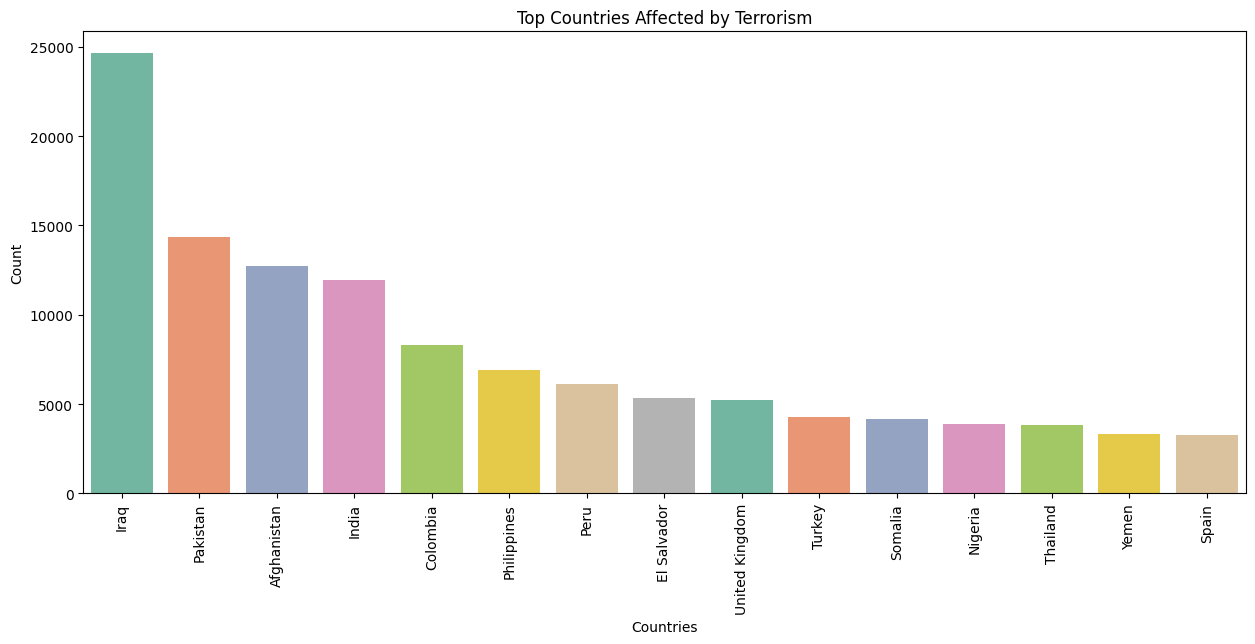

In [14]:
plt.subplots(figsize=(15, 6))
sns.barplot(x=terrorism_1['country_txt'].value_counts()[:15].index, y=terrorism_1['country_txt'].value_counts()[:15].values, palette='Set2')
plt.title('Top Countries Affected by Terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



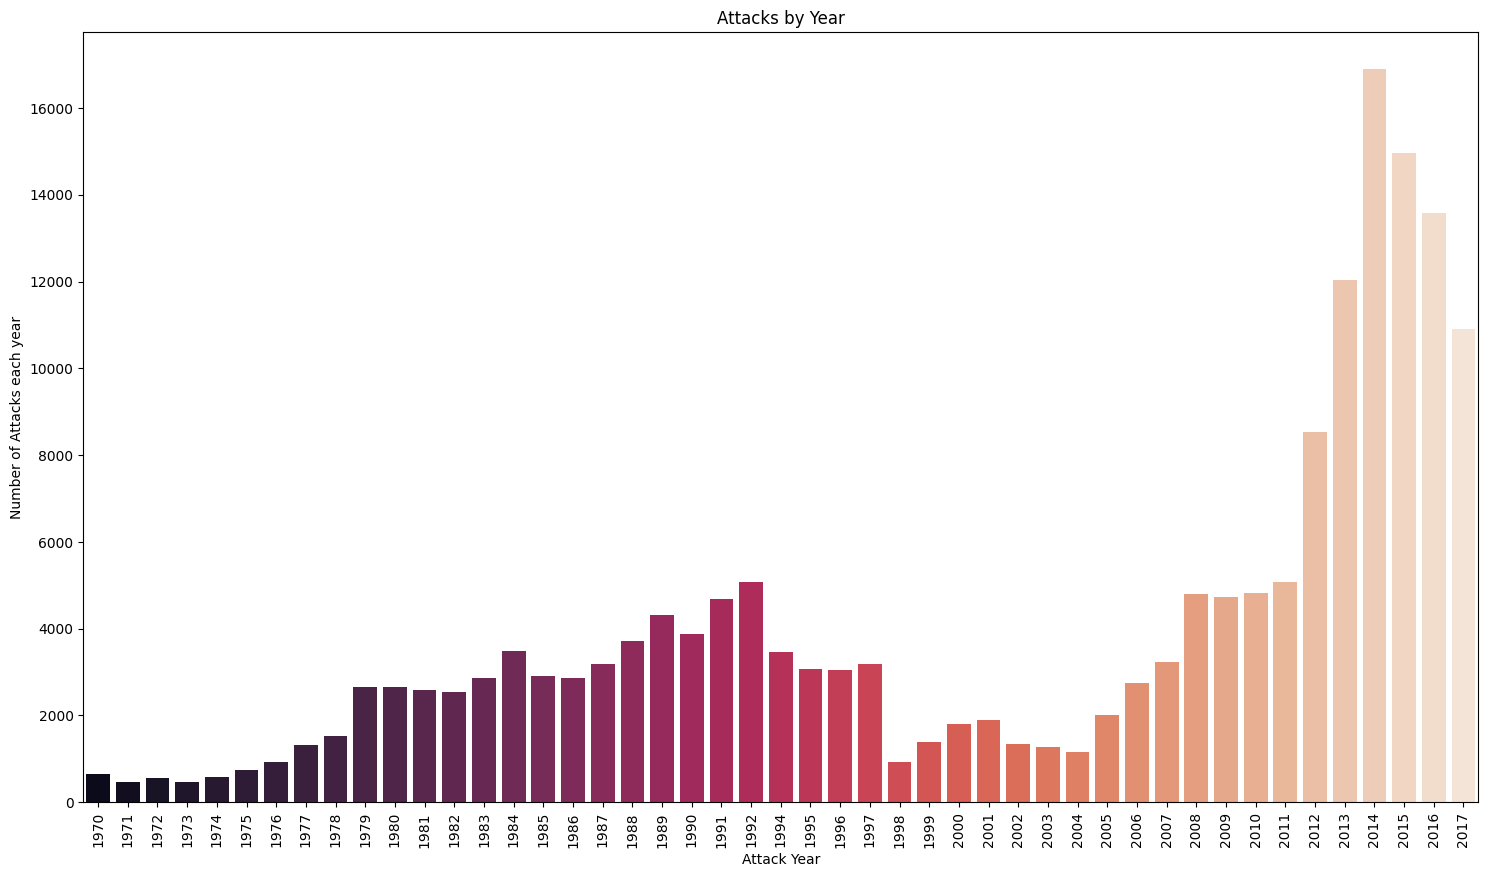

In [15]:
plt.figure(figsize=(18, 10))
sns.countplot(x='iyear', data=terrorism_1, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks by Year')
plt.show()


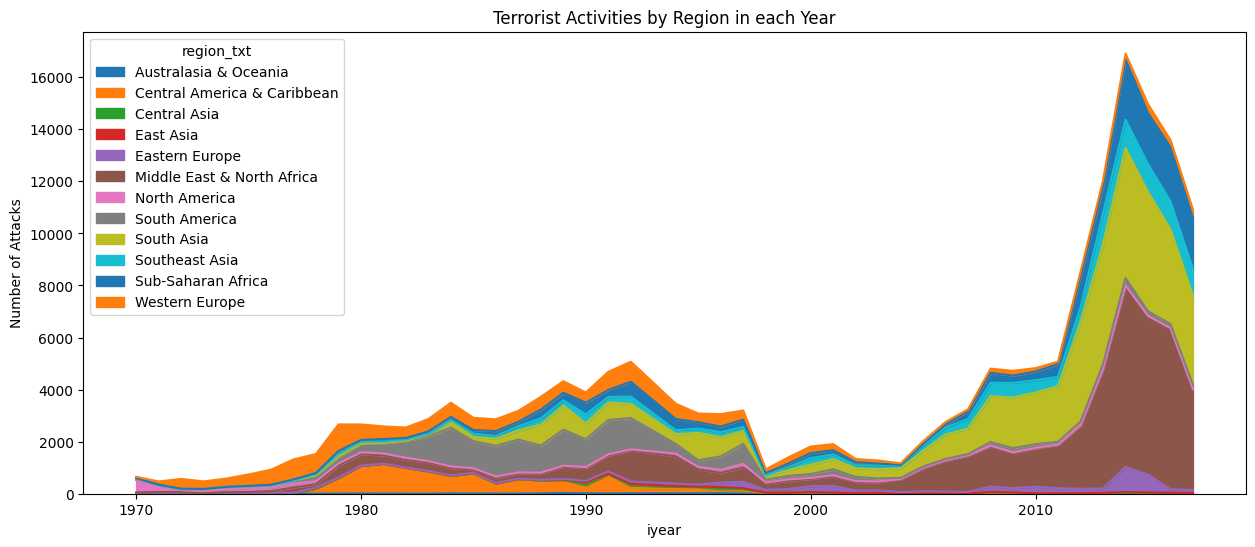

In [16]:
terrorism_1 = pd.crosstab(terrorism_1['iyear'], terrorism_1['region_txt'])
terrorism_1.plot(kind='area', stacked=True, figsize=(15, 6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()


## End 
